# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
data_path = "drive/MyDrive/Homeworks/yulu_bike_sharing_dataset.csv"
df = pd.read_csv(data_path)
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  month        10886 non-null  int32  
 12  hour         10886 non-null  int32  
 13  weekday      10886 non-null  object 
 14  weekday_num  10886 non-null  int32  
 15  week         10886 non-null  UInt32 
 16  year         10886 non-null  int32  
 17  day          10886 non-null  int32  
dtypes: UInt32(1

In [4]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'month',
       'hour', 'weekday', 'weekday_num', 'week', 'year', 'day'],
      dtype='object')

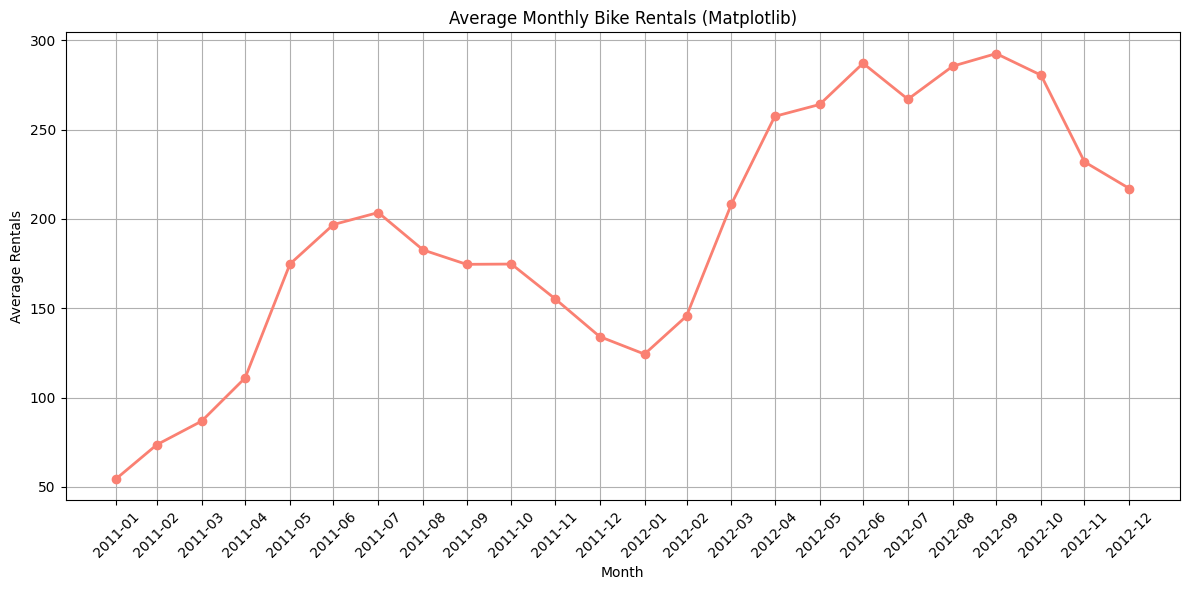

In [5]:
monthly_avg = df['count'].resample('ME').mean()
plt.figure(figsize=(12,6))
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='salmon',
    linewidth=2
)
plt.title('Average Monthly Bike Rentals (Matplotlib)')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.grid(True)

plt.xticks(monthly_avg.index, monthly_avg.index.strftime('%Y-%m'), rotation=45)

plt.tight_layout()
plt.show();


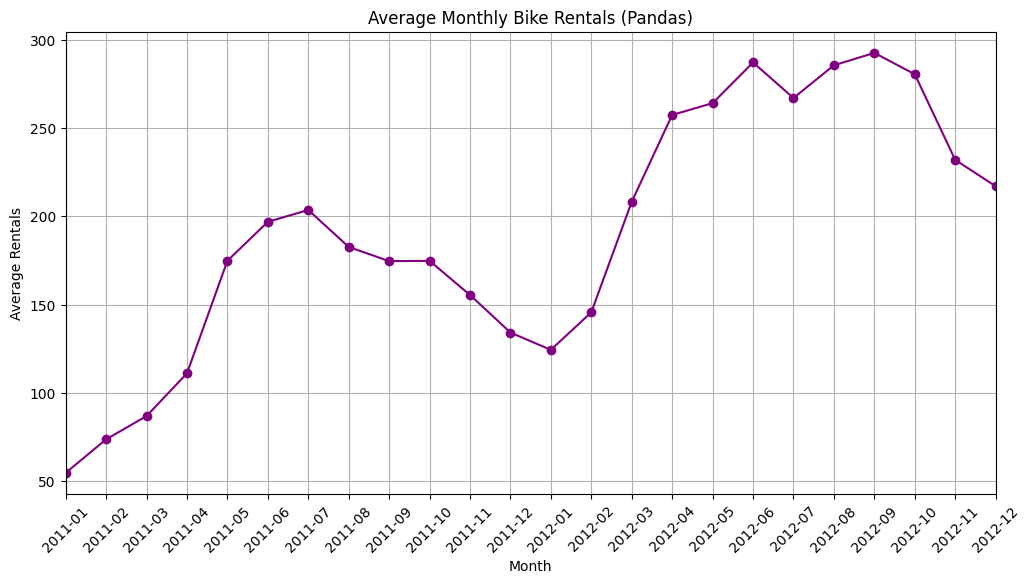

In [6]:
bike_rentals = monthly_avg.plot(
    kind='line',
    marker='o',
    color='purple',
    figsize=(12,6),
    title='Average Monthly Bike Rentals (Pandas)',
    grid=True
)

bike_rentals.set_xlabel('Month')
bike_rentals.set_ylabel('Average Rentals')

bike_rentals.set_xticks(monthly_avg.index)
bike_rentals.set_xticklabels(monthly_avg.index.strftime('%Y-%m'), rotation=45);


Both plots are similar visually as DataFrame.plot() uses Matplotlib. For quick analysis I would use Panda (quick to create, less code needed in general); however, for more complex plots with annotations, for example, I would use matplotlib (more detailed but also requires more code). Difference in starting point is visible - matplotlib adds a margin.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [7]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

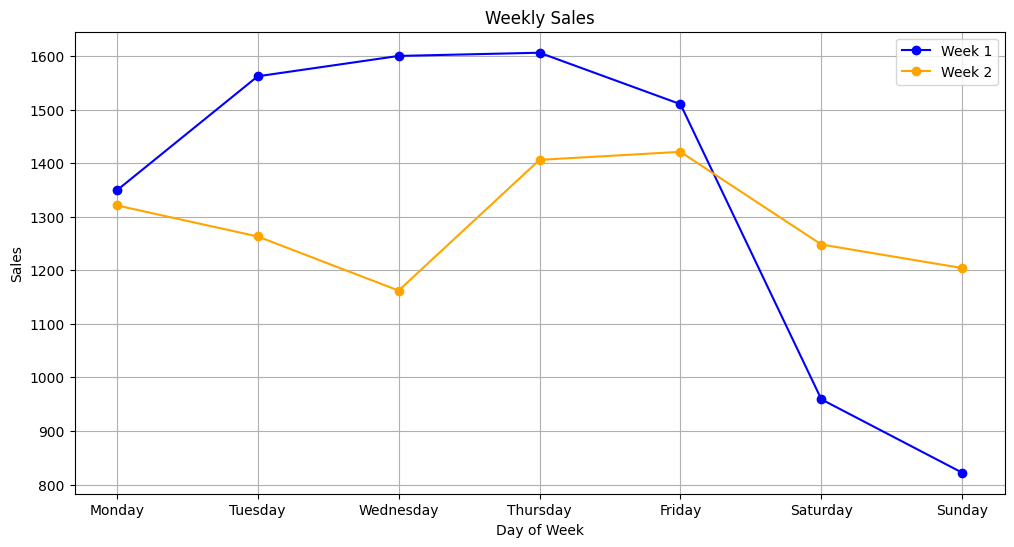

In [8]:
plt.figure(figsize=(12,6))

plt.plot(days, sales_week1, marker='o', color='blue', label='Week 1')
plt.plot(days, sales_week2, marker='o', color='orange', label='Week 2')

plt.title('Weekly Sales')
plt.xlabel('Day of Week')
plt.ylabel('Sales')

plt.legend()

plt.xticks(days, ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.grid(True)
plt.show()


1. Week_1  - high volatility, week_2 is less volatile, fluctuations can be observed but there is no severe drop as in week_1.

2. It's possible to claculate a range (spread of fluctuations) as well as a standard deviation (to see how daily sales deviate from average weekly sale).

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

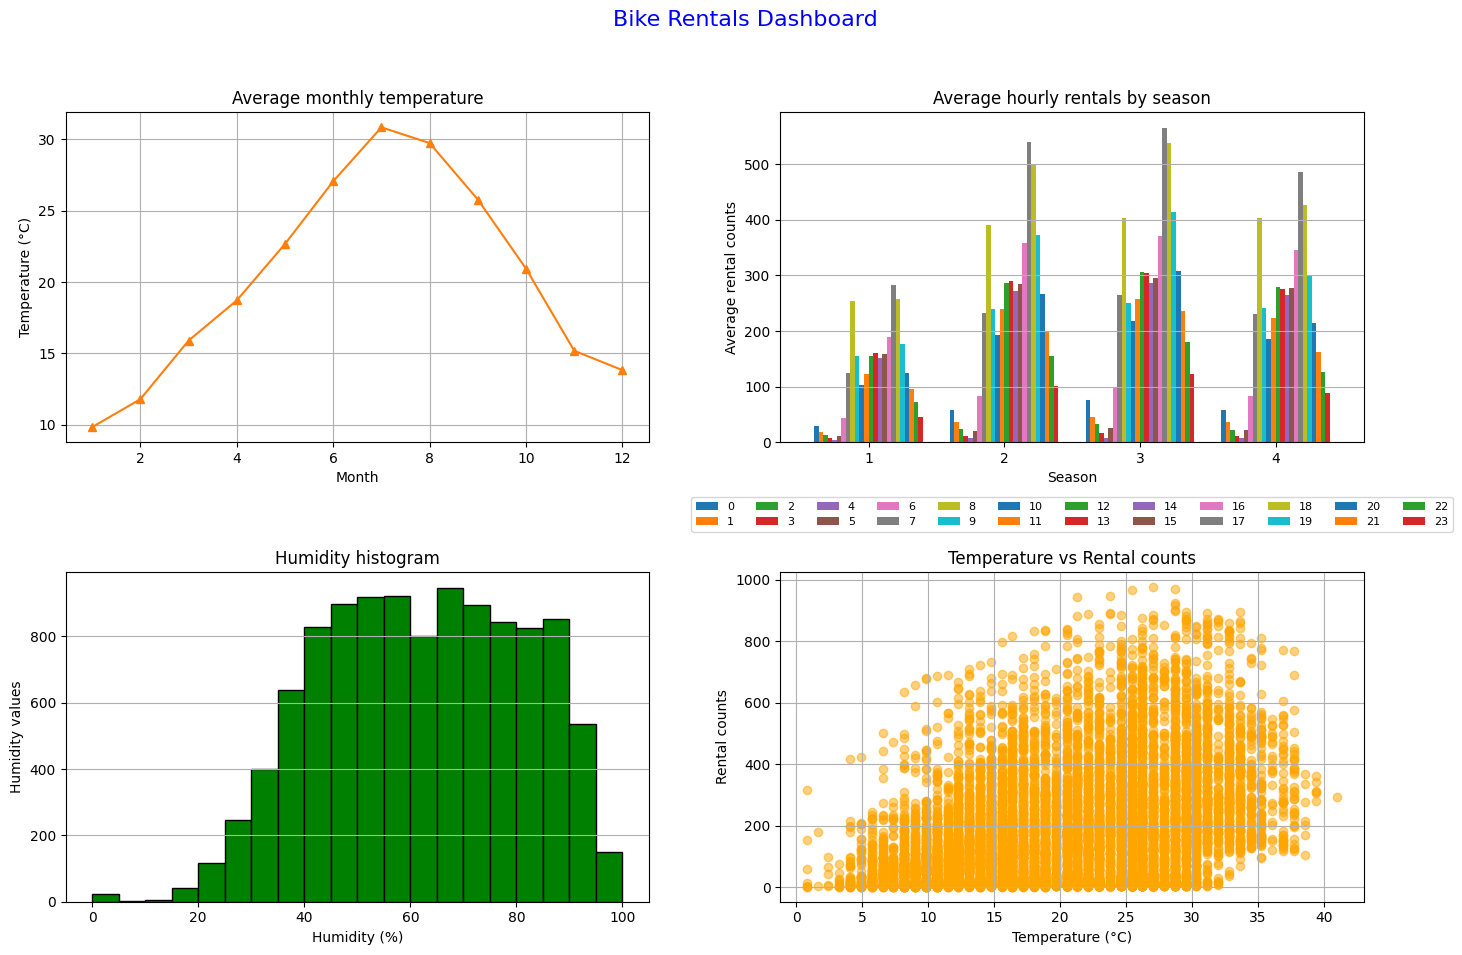

In [9]:
# 1. Average monthly temperature
monthly_temp = df.groupby('month')['temp'].mean()

# 2. Hourly rentals by season
hourly_rentals_by_season = df.groupby(['season','hour'])['count'].mean().unstack()

# 3. Humidity
humidity_values = df['humidity']

# 4. Temperature vs Rentals(count)
temp_vs_count = df[['temp','count']]

# Dashboard
plt.figure(figsize=(15, 10))
plt.suptitle('Bike Rentals Dashboard', color= 'blue', fontsize=16)

# Plot 1: Line plot
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='^', color='tab:orange')
plt.title('Average monthly temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot 2: Bar chart
plt.subplot(2, 2, 2)
hourly_rentals_by_season.plot(kind='bar', width=0.8, ax=plt.gca())
plt.title('Average hourly rentals by season')
plt.xlabel('Season')
plt.ylabel('Average rental counts')
plt.grid(axis='y')
plt.legend(ncol=12,loc='upper center',bbox_to_anchor=(0.5, -0.15),fontsize=8)
plt.xticks(rotation=0)

# Plot 3: Histogram
plt.subplot(2, 2, 3)
plt.hist(humidity_values, bins=20, color='green', edgecolor='black')
plt.title('Humidity histogram')
plt.xlabel('Humidity (%)')
plt.ylabel('Humidity values')
plt.grid(axis='y')

# Plot 4: Sactter plot
plt.subplot(2, 2, 4)
plt.scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, color='orange')
plt.title('Temperature vs Rental counts')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rental counts')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

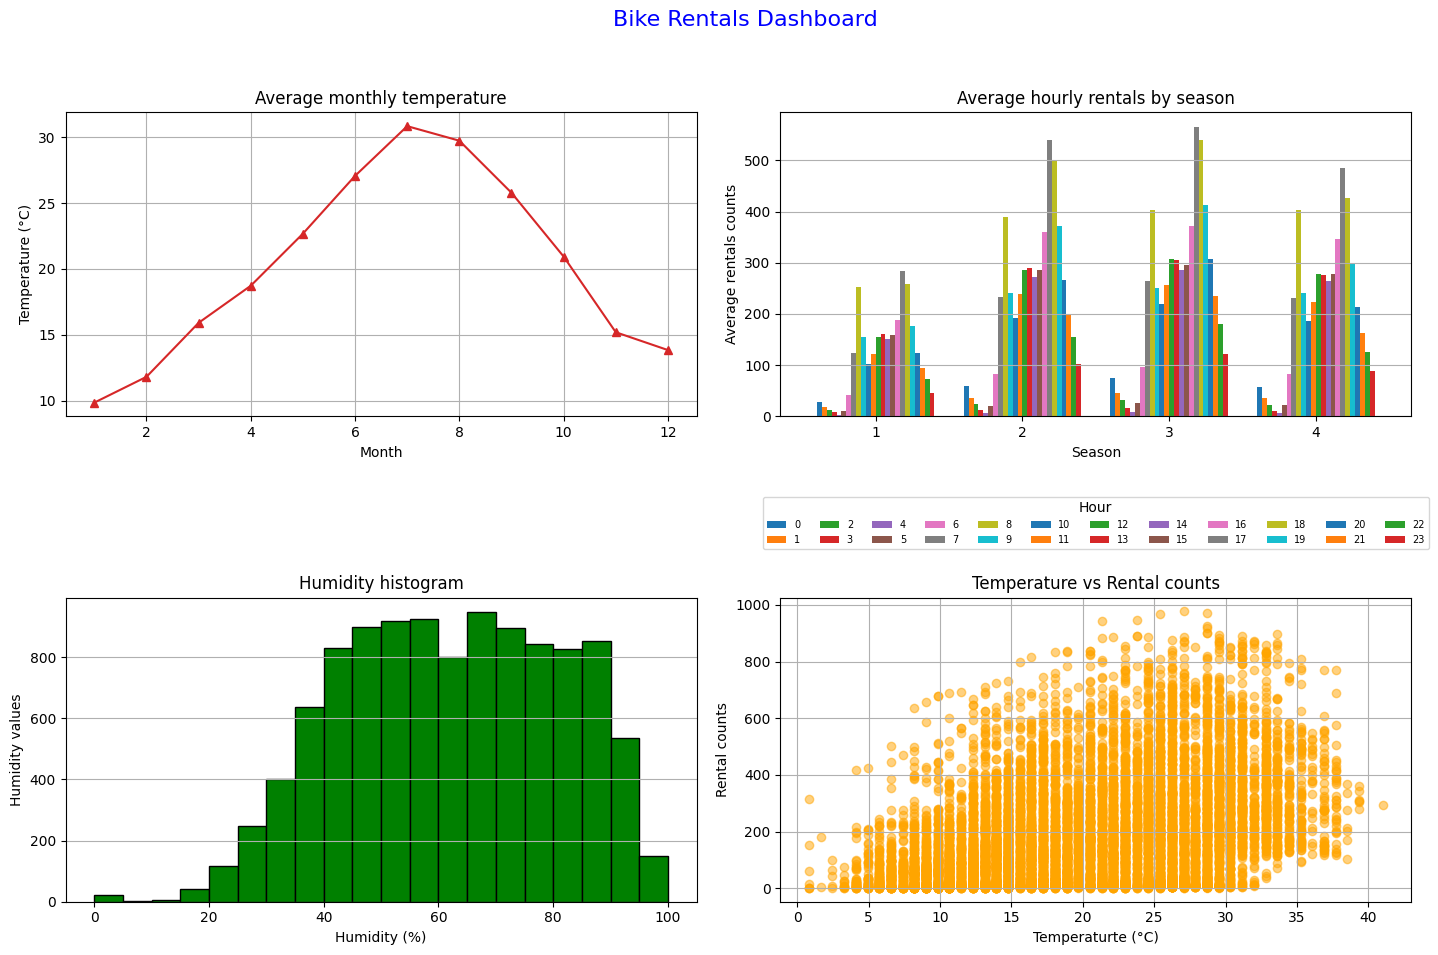

In [10]:
# 1. Average monthly temperature
monthly_temp = df.groupby('month')['temp'].mean()

# 2. Hourly rentals by season
hourly_rentals_by_season = df.groupby(['season', 'hour'])['count'].mean().unstack()

# 3. Humidity
humidity_values = df['humidity']

# 4. Temperature vs Rentals(count)
temp_vs_count = df[['temp', 'count']]

# Dashboard 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bike Rentals Dashboard', color= 'blue',fontsize=16)

# Plot 1: Line plot
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='^', color='tab:red')
axs[0, 0].set_title('Average monthly temperature')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)

# Plot 2: Bar chart
hourly_rentals_by_season.plot(kind='bar', width=0.8, ax=axs[0, 1])
axs[0, 1].set_title('Average hourly rentals by season')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('Average rentals counts')
axs[0, 1].legend(title='Hour', ncol=12,loc='upper center', bbox_to_anchor=(0.5, -0.25), fontsize=7)
axs[0, 1].grid(axis='y')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=0)

# Plot 3: Histogram
axs[1, 0].hist(humidity_values, bins=20, color='green', edgecolor='black')
axs[1, 0].set_title('Humidity histogram')
axs[1, 0].set_xlabel('Humidity (%)')
axs[1, 0].set_ylabel('Humidity values')
axs[1, 0].grid(axis='y')

# Plot 4: Scatter plot
axs[1, 1].scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, color='orange')
axs[1, 1].set_title('Temperature vs Rental counts')
axs[1, 1].set_xlabel('Temperaturte (°C)')
axs[1, 1].set_ylabel('Rental counts')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Overall plt.subplot() is an older approach that creates one axis at a time (used for simple plots), whereas plt.subplots() creates the entire grid of axes in one call and is used for more complex plots.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

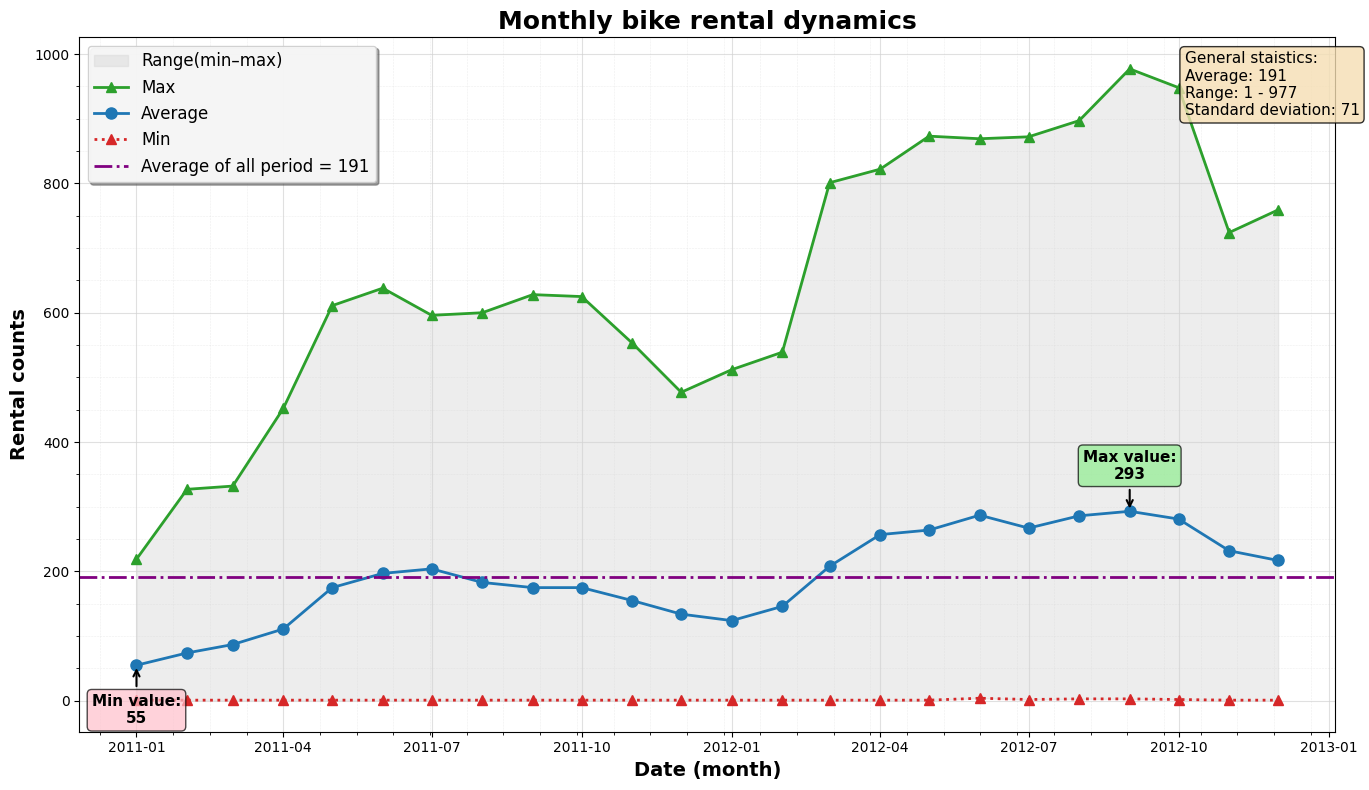

In [11]:
df['year_month'] = df.index.to_period('M')

# Monthly statistics
monthly_stats = df.groupby('year_month')['count'].agg(['mean', 'min', 'max']).round()

# Converting to timestamp
x = monthly_stats.index.to_timestamp()

# Months with highest & lowest mean
max_idx = monthly_stats['mean'].idxmax()
min_idx = monthly_stats['mean'].idxmin()

max_x, max_val = max_idx.to_timestamp(), monthly_stats.loc[max_idx, 'mean']
min_x, min_val = min_idx.to_timestamp(), monthly_stats.loc[min_idx, 'mean']

# Average
overall_avg = monthly_stats['mean'].mean()

plt.figure(figsize=(14,8))

# Shaded area between min & max
plt.fill_between(x,monthly_stats['min'], monthly_stats['max'],color='lightgray',alpha=0.4,label='Range(min–max)')

# Three lines
plt.plot(x, monthly_stats['max'],marker='^',linestyle='-', linewidth=2, markersize=7, color='tab:green', label='Max')
plt.plot(x, monthly_stats['mean'], marker='o',linestyle='-',linewidth=2,markersize=8, color='tab:blue', label='Average')
plt.plot(x, monthly_stats['min'], marker='^',linestyle=':', linewidth=2, markersize=7, color='tab:red', label='Min')

# Horizontal line: overall mean
plt.axhline(overall_avg, color='purple', linestyle='-.', linewidth=2,label=f'Average of all period = {overall_avg:.0f}')

# Annotations
plt.annotate(f'Max value:\n{max_val:.0f}', xy=(max_x, max_val), xytext=(max_x, max_val + 50),arrowprops=dict(arrowstyle='->', lw=1.5),fontsize=11, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7), ha='center')
plt.annotate(f'Min value:\n{min_val:.0f}', xy=(min_x, min_val),xytext=(min_x, min_val - 90), arrowprops=dict(arrowstyle='->', lw=1.5),fontsize=11, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='pink', alpha=0.7), ha='center')

# Dual grid
plt.grid(which='major', linewidth=0.8, color='lightgray', alpha=0.7)
plt.grid(which='minor', linewidth=0.4, linestyle='--', color='lightgray', alpha=0.4)
plt.minorticks_on()

# Titles & labels
plt.title('Monthly bike rental dynamics', fontsize=18, fontweight='bold')
plt.xlabel('Date (month)', fontsize=14, fontweight='bold')
plt.ylabel('Rental counts', fontsize=14, fontweight='bold')

# Legend
leg = plt.legend(fontsize=12, loc='upper left',shadow=True, frameon=True, fancybox=True, framealpha=0.9)
leg.get_frame().set_facecolor('white')

# Statistics
stats_text = (
    f"General staistics:\n"
    f"Average: {monthly_stats['mean'].mean():.0f}\n"
    f"Range: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n"
    f"Standard deviation: {monthly_stats['mean'].std():.0f}"
)

plt.text(0.88, 0.98, stats_text,transform=plt.gca().transAxes,fontsize=11, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='wheat', alpha=0.8, boxstyle='round'))

plt.tight_layout()
plt.show()


1. Annotations are used to indicate specific data points on a graph, to draw attention to important data like a max or min, helps to explain outliers.

2. Fill_between() is used for fillig the area between 2 horizontal curves or a curve and a horizontal line in order to show a range, highlight a thereshold, or visuliaze a sd.

3. Text box highlights key takeaways - summarizing key findings (brief overview).